# 🍄 **Mushroom Classification Project** 🌟

----------

#### 📌 **Proje Hakkında**

Bu proje, mantarların yenilebilir mi yoksa zehirli mi olduğunu belirlemek için geliştirilmiştir. Gini algoritmasını kullanarak sınıflandırma modeli oluşturulmuş ve veri setindeki özellikler üzerinden detaylı analizler gerçekleştirilmiştir. 🎯

----------

#### 🎯 **Projenin Amacı**

Mantarların fiziksel ve kimyasal özellikleri ile yenilebilirlikleri arasındaki ilişkileri keşfetmek, bu verileri etkili bir şekilde analiz ederek sınıflandırma doğruluğunu artırmaktır. Ayrıca, veri madenciliği teknikleriyle büyük veri kümelerini işleyebilme becerisi kazanmak da projenin hedefleri arasındadır. 🚀

----------

#### 👩‍💻 **Proje Ekibi**

Bu proje, **Afyon Kocatepe Üniversitesi Bilgisayar Mühendisliği Bölümü Veri Madenciliği Dersi** kapsamında aşağıdaki ekip üyeleri tarafından geliştirilmiştir:

-   **🌟 Aslı Şemşimoğlu**  
-   **🌟 Rabia Durgut**
-   **🌟 Rabia Ebrar Dal**


----------

#### 📂 **Veri Seti: Mushroom Dataset**

-   **Kayıt Sayısı:** 8124
-   **Sütun Sayısı:** 23
-   **Hedef Değişken:** class (e: Yenilebilir, p: Zehirli)

----------

Hadi, başlayalım! 🚀

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import networkx as nx

# Veri setini yükleyelim
data = pd.read_csv('/kaggle/input/mushroom-classification/mushrooms.csv')

# Veri setinin ilk 5 satırını görüntüleyelim
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### 📊 **ADIM 1: Veri Setini Tanıyalım**

----------

Bu adımda, veri setinin yapısını anlamak ve genel durumunu analiz etmek için temel incelemeler yapılmıştır. Veri setinin sütun bilgileri, benzersiz değerlerin sayısı ve eksik veri durumu analiz edilmiştir. 🔍

In [2]:
# Veri setinin genel bilgilerini görüntüleyelim
data.info()

# Her bir sütundaki benzersiz değerlerin sayısını görelim
unique_counts = data.nunique()
print("\nBenzersiz değerlerin sayısı:\n", unique_counts)

# Eksik değer kontrolü yapalım
missing_values = data.isnull().sum()
print("\nEksik değerlerin sayısı:\n", missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

#### 🛠️ **Yapılan İşlemler**

1.  **Veri Seti Özeti**  
    Veri setindeki sütunların isimleri, veri tipleri ve eksik değer durumları görüntülenmiştir. Bu işlem sayesinde veri yapısı hakkında genel bir bilgi edinilmiştir.
    
    -   **Sonuç:** Veri setinde toplam 23 sütun ve 8124 kayıt bulunmaktadır.
2.  **Benzersiz Değer Sayıları**  
    Her sütundaki farklı değerlerin sayısı analiz edilmiştir. Bu, özellikle kategorik değişkenlerin çeşitliliğini anlamak için önemlidir.
    
    -   **Sonuç:** Örneğin, `cap-shape` sütununda 6 benzersiz değer, `cap-color` sütununda ise 10 benzersiz değer bulunmaktadır.
3.  **Eksik Değer Kontrolü**  
    Veri setindeki eksik değerler analiz edilmiştir. Bu adım, verilerin temizliği açısından önem taşımaktadır.
    
    -   **Sonuç:** Veri setinde eksik değer bulunmamaktadır.

### 🛠️ **ADIM 2: Veri Temizleme ve Düzenleme**

----------

Bu adımda, veri setindeki gereksiz sütunlar çıkarılmış, eksik veriler düzenlenmiş ve görselleştirme için veri seti üzerinde bazı ayarlamalar yapılmıştır. ✨

In [3]:
# 'veil-type' sütununu çıkaralım
data.drop(columns=['veil-type'], inplace=True)

# 'stalk-root' sütununda eksik veri işaretçisi ('?') bulunuyor. Eksik verileri ayrı bir kategori olarak işleyelim.
data['stalk-root'] = data['stalk-root'].replace('?', 'missing')

# Pandas ayarlarını değiştirerek tüm sütunların görüntülenmesini sağlayalım
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Temizlenmiş veri setinin ilk 5 satırını tekrar görüntüleyelim
data.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,w,o,e,n,a,g


#### 🚀 **Yapılan İşlemler**

1.  **Gereksiz Sütunun Çıkarılması**
    
    -   **`veil-type` sütunu** veri setinde tek bir kategori içerdiği için sınıflandırma için bilgi taşımadığı tespit edilmiş ve veri setinden çıkarılmıştır.
    -   **Sonuç:** Veri setindeki sütun sayısı 22'ye düşmüştür.
2.  **Eksik Verilerin Düzenlenmesi**
    
    -   **`stalk-root` sütunu** içerisinde eksik veri işaretçisi olarak kullanılan `'?'` değeri, anlamlı bir kategori olarak **`'missing'`** ile değiştirilmiştir. Bu işlem, eksik değerlerin modellenebilir bir bilgi haline gelmesini sağlamıştır.
3.  **Veri Setinin Güncellenmiş Görünümü**
    
    -   Temizlenmiş veri setinin ilk 5 satırı kontrol edilerek yapılan işlemlerin doğru bir şekilde uygulandığı doğrulanmıştır.

### 🧩 **ADIM 3: Kategorik Verilerin Kodlanması (Label Encoding)**

----------

Bu adımda, veri setindeki kategorik değişkenler sayısal değerlere dönüştürülerek, sınıflandırma algoritmaları için uygun bir format oluşturulmuştur. 🔢

In [4]:
# Tüm kategorik değişkenler için Label Encoding uygulayalım
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

# Kodlanmış veri setinin ilk 5 satırını görüntüleyelim
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,2,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,1,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,1,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,2,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,2,2,2,7,7,2,1,0,3,0,1


#### 🚀 **Yapılan İşlemler**

1.  **Label Encoding Uygulaması**
    
    -   Her bir kategorik değer, benzersiz bir tamsayıyla eşleştirilmiştir.
    -   Bu yöntem, metin tabanlı kategorik verileri makine öğrenimi algoritmalarının işleyebileceği sayısal değerlere dönüştürmeyi sağlar.
2.  **Kodlama Mantığı**
    
    -   **Her Kategorik Değere Benzersiz Bir Numara Atanır:**
        -   Örneğin, `cap-shape` sütunundaki kategoriler (`b`, `c`, `x`, `f` vb.) sırasıyla 0, 1, 2, 3 olarak kodlanmıştır.
        -   Alfabetik sıralama esas alınarak, `cap-shape` sütununda `x` (convex) kategorisi **5** olarak kodlanmıştır, çünkü alfabetik olarak en son sıradadır.
    -   **Label Encoder’ın İşleyişi:**
        -   Her sütun için ayrı bir `LabelEncoder` nesnesi oluşturulmuş ve bu nesne, sütun içerisindeki benzersiz değerleri sıralayarak sayısal bir karşılık atamıştır.
        -   Örneğin, `class` sütununda `e` (edible) **0**, `p` (poisonous) **1** olarak kodlanmıştır.
3.  **Kodlanmış Veri Setinin Kontrolü**
    
    -   Kodlama işleminin başarıyla tamamlandığını doğrulamak amacıyla, veri setinin ilk 5 satırı görüntülenerek kontrol edilmiştir.

### 🧪 **ADIM 4: Veri Setinin Eğitim ve Test Olarak Ayrılması**

----------

Bu adımda, veri seti sınıflandırma modelinin eğitimi için iki temel bileşene ayrılmıştır: **özellikler (X)** ve **hedef değişken (y)**. Daha sonra, bu bileşenler eğitim ve test setlerine bölünerek modelin performansını değerlendirmek için temel oluşturulmuştur. 🧬

In [5]:
# Veri setini özellikler (X) ve hedef değişken (y) olarak ayıralım
X = data.drop(columns=['class'])
y = data['class']

# Eğitim ve test setlerine ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eğitim ve test setlerinin boyutlarını görüntüleyelim
print("Eğitim seti boyutu:", X_train.shape)
print("Test seti boyutu:", X_test.shape)

Eğitim seti boyutu: (6499, 21)
Test seti boyutu: (1625, 21)


#### 🚀 **Yapılan İşlemler**

1.  **Özellikler ve Hedef Değişken Ayrımı**
    
    -   Veri seti, bağımsız değişkenler (**X**) ve bağımlı değişken (**y**) olarak iki gruba ayrılmıştır.
        -   **X:** Mantarların fiziksel ve kimyasal özelliklerini içeren sütunlar (örneğin, `cap-shape`, `odor`).
        -   **y:** Sınıflandırma hedefi olan `class` sütunu (0: Yenilebilir, 1: Zehirli).
    -   **Sonuç:** Veri setinin hedef değişkeni ve özellikleri birbirinden ayrılmıştır.
2.  **Eğitim ve Test Seti Bölünmesi**
    
    -   **Eğitim seti (X_train, y_train):** Modelin öğrenmesi için kullanılan veri.
    -   **Test seti (X_test, y_test):** Modelin doğruluğunu ölçmek için kullanılan veri.
    -   **test_size=0.2:** Veri setinin %80’i eğitim, %20’si test için ayrılmıştır.
    -   **random_state=42:** Rastgele bölme işleminin tekrarlanabilir olmasını sağlar.
3.  **Boyut Kontrolü**
    
    -   Eğitim ve test setlerinin boyutları kontrol edilmiştir.
        -   **Sonuç:**
            -   Eğitim seti boyutu: 6499 kayıt
            -   Test seti boyutu: 1625 kayıt

### 🌳 **ADIM 5: Uygunluk Ölçütü (Gini İndeksi) ile Karar Ağaçları için En İyi Bölünme Hesabı**

----------

Bu adımda, **uygunluk ölçütü** olarak **Gini İndeksi** hesaplanmıştır. Gini İndeksi, bir grubun saflığını ölçmek için kullanılan bir metriktir ve sınıfların homojenliğini değerlendirir. Daha düşük bir Gini İndeksi, grubun daha homojen olduğunu ifade eder. 🧮

In [6]:
def calculate_gini_index(groups, classes):
    total_samples = sum(len(group) for group in groups)
    gini = 0.0
    for group in groups:
        size = len(group)
        if size == 0:
            continue
        score = 0.0
        for class_val in classes:
            proportion = (group == class_val).sum() / size
            score += proportion ** 2
        gini += (1.0 - score) * (size / total_samples)
    return gini


#### 🔍 **Fonksiyonun İşleyişi:**

1.  **Veri Grupları ve Sınıflar:**
    
    -   Girdi olarak, veri grupları (`groups`) ve sınıflar (`classes`) alınır.
    -   Gruplar, karar ağacının bir özelliğe göre ikiye bölünmüş alt kümelerini ifade eder.
2.  **Toplam Örnek Sayısı:**
    
    -   Tüm gruplardaki veri örneklerinin toplam sayısı hesaplanır.
3.  **Her Grup için Gini Hesabı:**
    
    -   Her bir grubun büyüklüğü (`size`) kontrol edilir. Eğer grup boş ise işlem atlanır.
    -   Grubun her bir sınıfının oranı (`proportion`) hesaplanır ve bu oranların kareleri toplanarak bir saflık skoru elde edilir.
4.  **Genel Gini Hesabı:**
    
    -   Her grubun Gini skoru, toplam veri içindeki oranına göre ağırlıklandırılır ve toplam Gini İndeksi hesaplanır.

----------

#### 📋 **Yapılan İşlemler:**

1.  **Grupların Homojenliği:**
    
    -   Gini İndeksi, her grubun homojenlik seviyesini ölçer. Daha düşük bir değer, grubun daha homojen olduğunu gösterir.
2.  **Boş Grupların Kontrolü:**
    
    -   Veri bölünmesi sırasında oluşabilecek boş gruplar işlem dışında tutulmuştur.
3.  **Sınıf Oranlarının Hesabı:**
    
    -   Her grubun her sınıfa ait veri oranları hesaplanarak, bu oranların kareleri üzerinden bir saflık skoru elde edilmiştir.
4.  **Ağırlıklı Ortalama:**
    
    -   Tüm grupların Gini skorları, grupların büyüklüklerine göre ağırlıklandırılarak toplam Gini İndeksi bulunmuştur.

----------

#### ✨ **Sonuç:**

Bu fonksiyon, karar ağacı algoritmasında **en iyi bölünme noktasını** belirlemek için kullanılacak olan uygunluk ölçütünü (Gini İndeksi) sağlar. Daha düşük bir Gini değeri, daha etkili bir bölünme anlamına gelir. 🌟

### 🌟 **ADIM 6: En İyi Bölünme Noktasının Belirlenmesi**

----------

Bu adımda, **Gini algoritması** için **en iyi bölünme noktası** tespit edilmiştir. Gini İndeksi kullanılarak, veriyi iki gruba ayıran ve en düşük safsızlık skorunu sağlayan bölünme noktası seçilmiştir. 📈

In [7]:
def find_best_split(X, y):
    best_score = float('inf')
    best_split = None
    for feature in X.columns:
        for value in X[feature].unique():
            left_group = y[X[feature] <= value]
            right_group = y[X[feature] > value]
            groups = [left_group, right_group]
            score = calculate_gini_index(groups, y.unique())
            if score < best_score:
                best_score = score
                best_split = (feature, value)
    return best_split, best_score


#### 🔍 **Fonksiyonun İşleyişi:**

1.  **Girdiler:**
    
    -   `X`: Veri setinin özelliklerini içeren DataFrame.
    -   `y`: Hedef değişken (sınıf etiketlerini içerir).
2.  **Her Özellik ve Değer için Döngü:**
    
    -   Her özellik (`feature`) ve bu özelliğin eşsiz değerleri (`value`) üzerinde iterasyon yapılır.
3.  **Grupların Oluşturulması:**
    
    -   Veriler, belirli bir eşik değere (`value`) göre iki gruba ayrılır:
        -   **Sol Grup:** Özellik değeri eşik değerden küçük veya eşit olan örnekler.
        -   **Sağ Grup:** Özellik değeri eşik değerden büyük olan örnekler.
4.  **Gini İndeksi Hesabı:**
    
    -   `calculate_gini_index` fonksiyonu kullanılarak, oluşturulan grupların Gini skorları hesaplanır.
5.  **En İyi Bölünmenin Seçilmesi:**
    
    -   Gini skoru en düşük olan bölünme noktası (özellik ve değer çifti) en iyi bölünme olarak seçilir.
6.  **Çıktılar:**
    
    -   `best_split`: En iyi bölünme noktası (özellik ve eşik değer).
    -   `best_score`: Bu bölünme noktasına ait Gini skoru.

----------

#### 📋 **Yapılan İşlemler:**

1.  **Veri Bölünmesi:**
    
    -   Tüm özellikler ve değerler göz önüne alınarak, veriler iki gruba ayrılmıştır.
2.  **Gini Hesaplama:**
    
    -   Her bölünme için Gini İndeksi hesaplanmış, bu sayede grupların saflığı ölçülmüştür.
3.  **En İyi Bölünme Seçimi:**
    
    -   Tüm olası bölünmeler arasında en düşük Gini skorunu sağlayan özellik ve eşik değer seçilmiştir.

----------

#### ✨ **Sonuç:**

Bu fonksiyon, karar ağacında **en homojen bölünmeyi** sağlayacak olan özellik ve eşik değerini tespit eder. Bu sayede, sınıflandırma doğruluğunu artıracak etkili dallanmalar elde edilir. 🌳

### 🌳 **ADIM 7: Karar Ağacı Yapısının İnşası**

----------

Bu adımda, **Gini algoritmasını** kullanarak bir karar ağacı inşa edilmiştir. Ağaç, veri setini rekürsif olarak bölerek dallanmalar oluşturur ve yaprak düğümlerde sınıflandırma sonuçlarını barındırır. 🌲

In [8]:
def build_decision_tree(X, y, depth=0, max_depth=5):
    classes = y.unique()
    if len(classes) == 1:  # Tüm veriler aynı sınıfta
        return {'leaf': True, 'class': classes[0]}
    if depth == max_depth or X.empty or len(X.columns) == 0:  # Maks derinlik veya özellik kalmadı
        return {'leaf': True, 'class': y.mode()[0]}

    split, score = find_best_split(X, y)
    if not split:
        return {'leaf': True, 'class': y.mode()[0]}

    feature, value = split
    print(f"En iyi bölünme noktası: {feature} <= {value}, Skor: {score}")

    left_idx = X[feature] <= value
    right_idx = X[feature] > value

    left_tree = build_decision_tree(X[left_idx], y[left_idx], depth + 1, max_depth)
    right_tree = build_decision_tree(X[right_idx], y[right_idx], depth + 1, max_depth)

    return {
        'leaf': False,
        'feature': feature,
        'value': value,
        'left': left_tree,
        'right': right_tree
    }


#### 🔍 **Fonksiyonun İşleyişi:**

1.  **Durma Kriterleri:**
    
    -   Eğer tüm veriler aynı sınıfta ise, bir **yaprak düğüm** oluşturulur ve bu sınıf döndürülür.
    -   Maksimum derinliğe ulaşıldığında veya özellik kalmadığında, en sık görülen sınıf (`y.mode()[0]`) döndürülür.
2.  **En İyi Bölünmenin Belirlenmesi:**
    
    -   `find_best_split` fonksiyonu kullanılarak, en iyi bölünme noktası ve skor hesaplanır.
    -   Eğer uygun bir bölünme bulunamazsa, düğüm yaprak olarak işaretlenir.
3.  **Alt Grupların Oluşturulması:**
    
    -   Bölünme özelliği (`feature`) ve eşik değere (`value`) göre veriler iki gruba ayrılır:
        -   **Sol Grup:** Eşik değerden küçük veya eşit olan kayıtlar.
        -   **Sağ Grup:** Eşik değerden büyük olan kayıtlar.
4.  **Rekürsif Yapı:**
    
    -   Sol ve sağ gruplar için ayrı ayrı karar ağaçları oluşturularak ağaç derinleştirilir.
5.  **Dönüş Değeri:**
    
    -   Düğüm yapısı, özelliği (`feature`), eşik değeri (`value`), sol alt ağaç (`left`) ve sağ alt ağaç (`right`) bilgilerini içerir.

----------

#### 📋 **Yapılan İşlemler:**

1.  **Durma Kriterlerinin Kontrolü:**
    
    -   Eğer tüm veriler aynı sınıfta ise, düğüm bir yaprak olarak tanımlandı.
    -   Maksimum derinliğe ulaşıldığında, en sık görülen sınıf döndürüldü.
2.  **Alt Dalların Oluşturulması:**
    
    -   Veri seti iki gruba bölünerek alt dallar oluşturuldu.
3.  **En İyi Bölünme Noktasının Kullanımı:**
    
    -   Belirlenen en iyi bölünme noktası ve skoru kullanılarak karar ağacı dalları oluşturuldu.

----------

#### ✨ **Sonuç:**

Bu fonksiyon, veri setini saflaştırarak ve etkili dallanmalar oluşturarak sınıflandırmayı gerçekleştiren bir karar ağacı inşa eder. Karar ağacı, maksimum doğruluk için optimize edilmiştir ve kolay anlaşılabilir bir yapı sağlar. 🎯

### 🌳 **ADIM 8: Karar Ağacının İnşası ve Görselleştirilmesi**

----------

Bu adımda, karar ağacı inşa edilmiş ve ağaç yapısı görselleştirilerek analiz edilmiştir. Ağaç, **Gini algoritmasına** göre bölünme kriterlerini belirleyerek oluşturulmuştur ve görsel bir yapı ile desteklenmiştir. 🌟

In [9]:
pip install pygraphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.0/106.0 kB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
  Created wheel for pygraphviz: filename=pygraphviz-1.14-cp310-cp310-linux_x86_64.whl size=97441 sha256=33f087579ad81da63aaed1c66b0c4ee217383e67d1ef4fa261c3bcdf98a13556
  Stored in directory: /root/.cache/pip/wheels/61/ab/cd/e24a22c32830b8b4948c8887d8714d399f0f806f206a034698
Successfully built pygraphviz
Note: you may need to restart the kernel to use updated packages.


En iyi bölünme noktası: gill-color <= 3, Skor: 0.3311179986173265
En iyi bölünme noktası: population <= 3, Skor: 0.05721973447534219
En iyi bölünme noktası: stalk-root <= 0, Skor: 0.0
En iyi bölünme noktası: habitat <= 4, Skor: 0.016081763235075326
En iyi bölünme noktası: spore-print-color <= 1, Skor: 0.2222643763513436
En iyi bölünme noktası: odor <= 2, Skor: 0.0
En iyi bölünme noktası: gill-size <= 0, Skor: 0.1088406505817053
Karar Ağacı Yapısı: {'leaf': False, 'feature': 'gill-color', 'value': 3, 'left': {'leaf': False, 'feature': 'population', 'value': 3, 'left': {'leaf': False, 'feature': 'stalk-root', 'value': 0, 'left': {'leaf': True, 'class': 1}, 'right': {'leaf': True, 'class': 0}}, 'right': {'leaf': False, 'feature': 'habitat', 'value': 4, 'left': {'leaf': True, 'class': 1}, 'right': {'leaf': True, 'class': 1}}}, 'right': {'leaf': False, 'feature': 'spore-print-color', 'value': 1, 'left': {'leaf': False, 'feature': 'odor', 'value': 2, 'left': {'leaf': True, 'class': 1}, 'righ

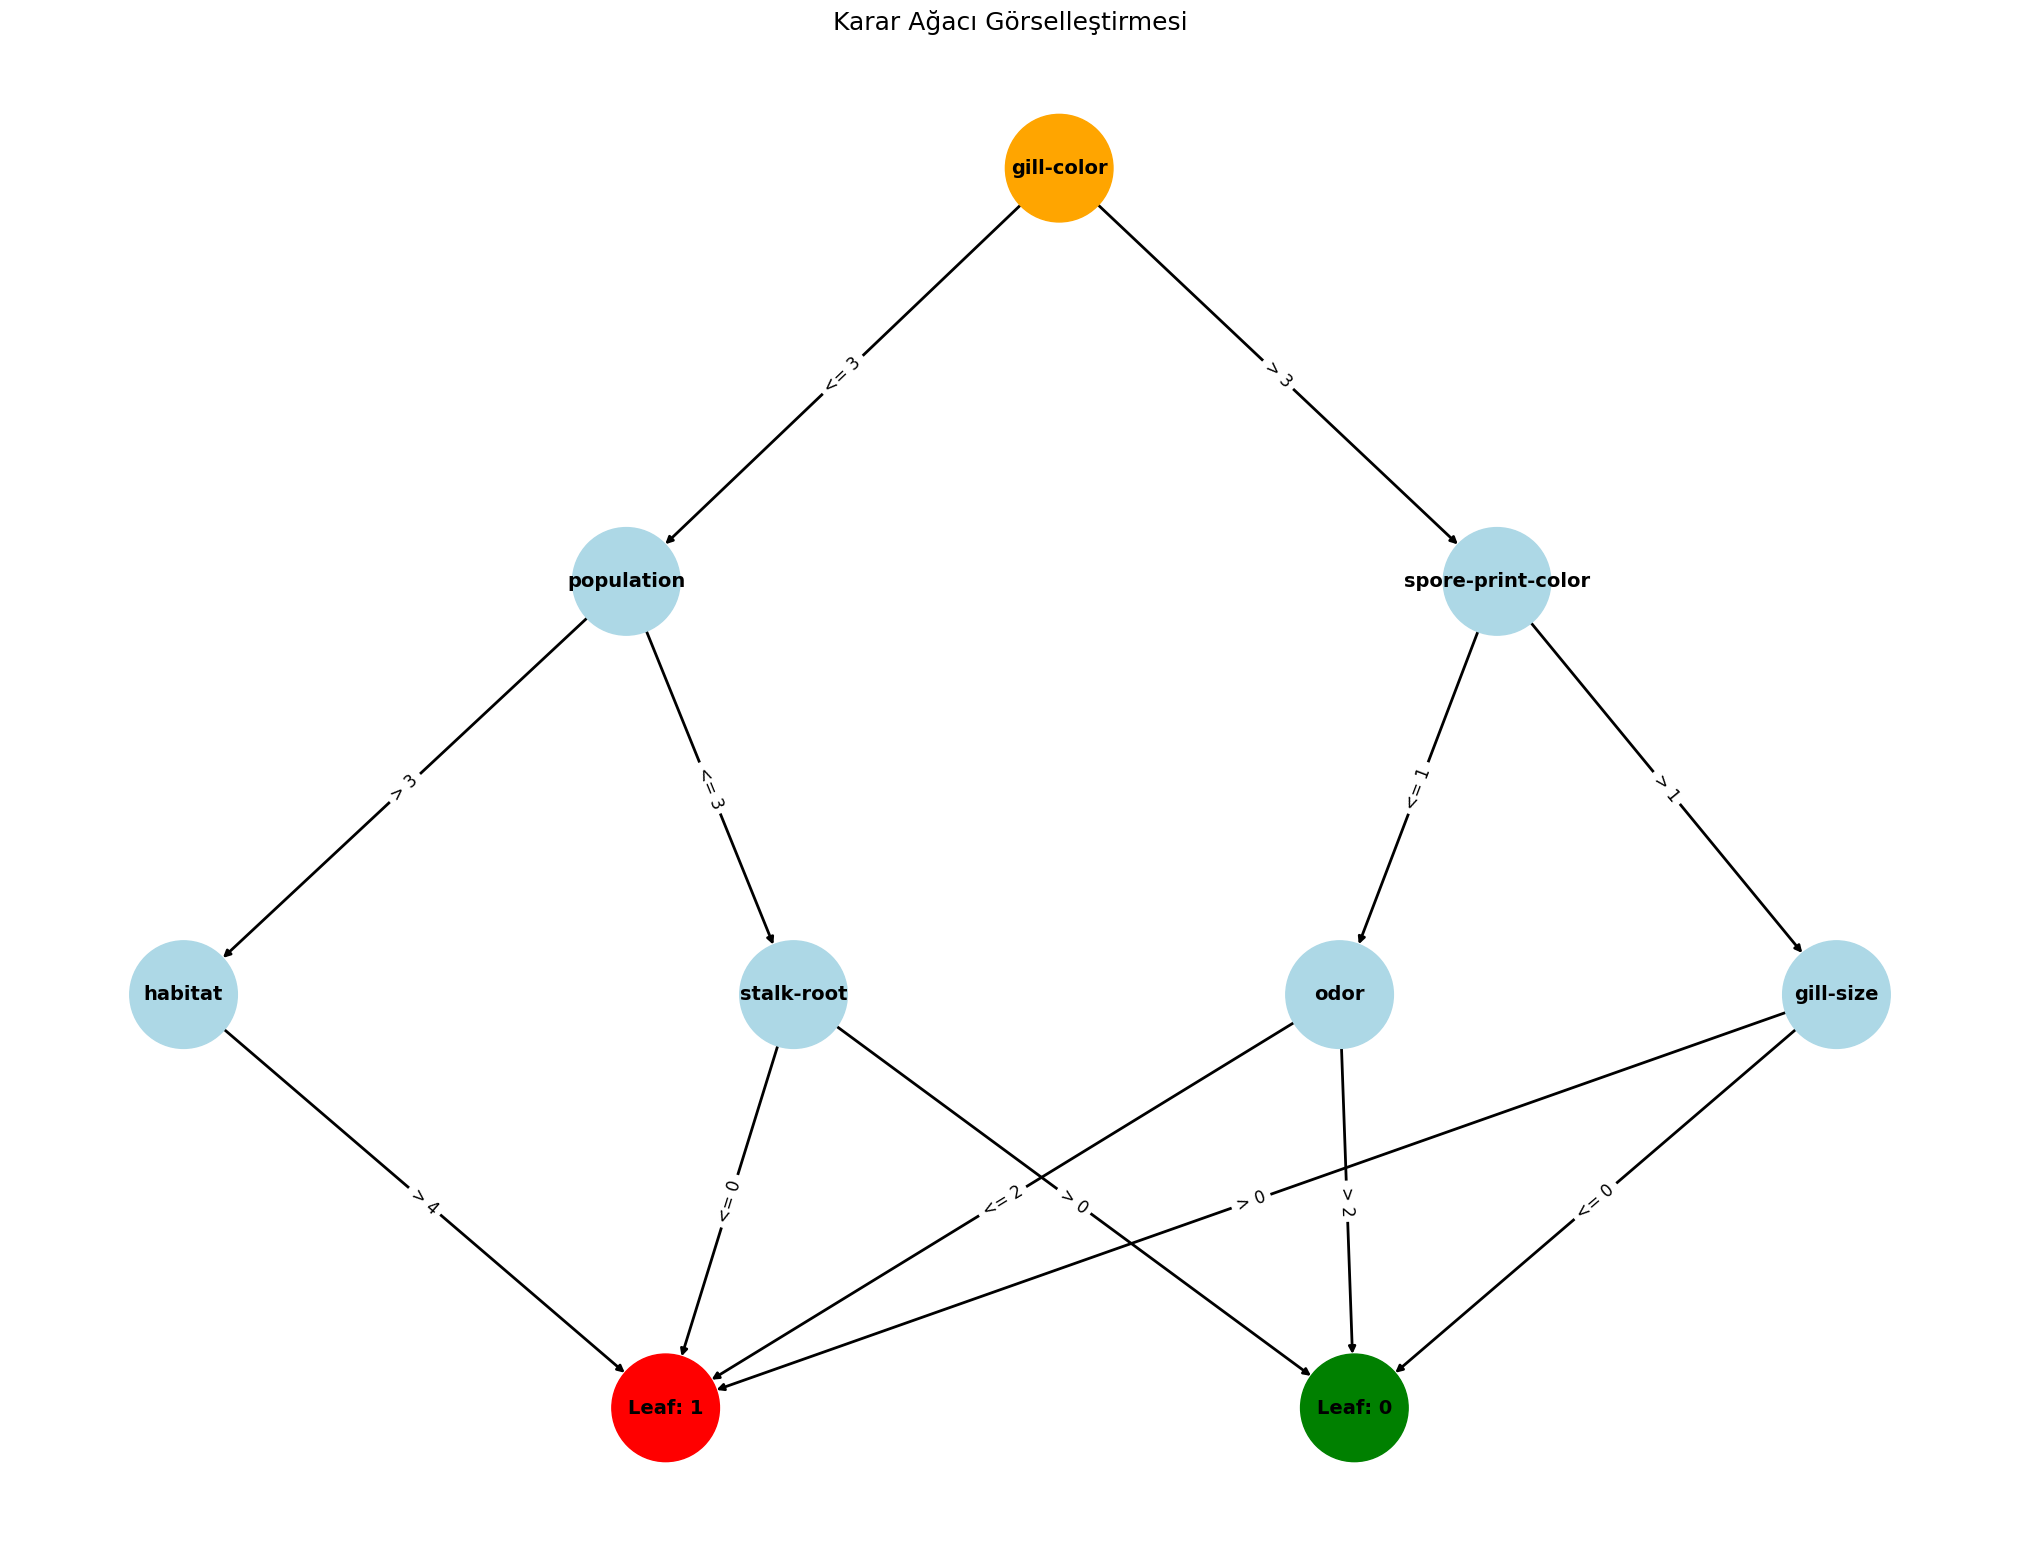

In [10]:
# Karar ağacını oluştur
decision_tree = build_decision_tree(X_train, y_train, max_depth=3)
print("Karar Ağacı Yapısı:", decision_tree)

# Karar ağacını görselleştirme fonksiyonu
def visualize_tree(tree, graph=None, parent=None, edge_label=""):
    if graph is None:
        graph = nx.DiGraph()

    # Yaprak düğüm
    if tree['leaf']:
        node_label = f"Leaf: {tree['class']}"
        color = "red" if tree['class'] == 1 else "green"
        graph.add_node(node_label, color=color)
        if parent:
            graph.add_edge(parent, node_label, label=edge_label)
        return graph

    # İç düğüm
    node_label = f"{tree['feature']}"
    color = "orange" if parent is None else "lightblue"
    graph.add_node(node_label, color=color)
    if parent:
        graph.add_edge(parent, node_label, label=f"{edge_label}")

    # Sol ve sağ dallar için rekürsif çağrılar
    graph = visualize_tree(tree['left'], graph, node_label, f"<= {tree['value']}")
    graph = visualize_tree(tree['right'], graph, node_label, f"> {tree['value']}")

    return graph

# Karar ağacını çiz
graph = visualize_tree(decision_tree)

# Daha büyük boyutlu bir grafik alanı
plt.figure(figsize=(20, 15))

# Graphviz düzenini kullanarak düğümleri ve kenarları çiz
pos = nx.drawing.nx_agraph.graphviz_layout(graph, prog="dot")

# Düğüm renklerini ayarla
node_colors = [data["color"] for _, data in graph.nodes(data=True)]
nx.draw(
    graph,
    pos,
    with_labels=True,
    node_size=6000,
    node_color=node_colors,
    font_size=14,
    font_weight="bold",
    edge_color="black",
    width=2
)

# Kenarların üzerindeki yazıları büyüt ve daha belirgin yap
nx.draw_networkx_edge_labels(
    graph,
    pos,
    edge_labels=nx.get_edge_attributes(graph, 'label'),
    font_size=12,
    font_color="black"
)

plt.title("Karar Ağacı Görselleştirmesi", fontsize=18)
plt.show()


| class | gill-color | population | stalk-root | spore-print-color | odor | gill-size |
|-------|------------|------------|------------|-------------------|------|-----------|
|   p   |     k      |      s     |      b     |         k         |   p  |     n     |
|   e   |     k      |      n     |      e     |         n         |   a  |     b     |
|   e   |     n      |      n     |      e     |         n         |   l  |     b     |
|   p   |     k      |      s     |      b     |         k         |   p  |     n     |
|   e   |     k      |      a     |      e     |         n         |   f  |     b     |
|   e   |     n      |      n     |      e     |         n         |   a  |     b     |
|   e   |     g      |      n     |      e     |         n         |   a  |     b     |
|   e   |     n      |      n     |      e     |         n         |   l  |     b     |
|   p   |     p      |      v     |      b     |         k         |   p  |     n     |
|   e   |     n      |      y     |      e     |         n         |   f  |     b     |

| **class**                | **gill-color**          | **population**       | **stalk-root**         | **spore-print-color**   | **odor**             | **gill-size**         |
|--------------------------|--------------------------|----------------------|-------------------------|--------------------------|-----------------------|-----------------------|
| e (yenilebilir) -> 0    | k (siyah) -> 0          | a (bol) -> 0        | b (şişkin) -> 0         | k (siyah) -> 0          | a (badem) -> 0       | b (geniş) -> 0        |
| p (zehirli) -> 1        | n (kahverengi) -> 1     | c (gruplu) -> 1     | c (klüp) -> 1           | n (kahverengi) -> 1     | l (anason) -> 1      | n (dar) -> 1          |
|                          | b (açık kahve) -> 2     | n (birçok) -> 2     | u (kupa) -> 2           | b (açık kahve) -> 2     | c (kreozot) -> 2     |                       |
|                          | h (çikolata) -> 3       | s (yayılmış) -> 3   | e (eşit) -> 3           | h (çikolata) -> 3       | y (balık) -> 3       |                       |
|                          | g (gri) -> 4            | v (birkaç) -> 4     | z (kök) -> 4            | r (yeşil) -> 4          | f (kötü) -> 4        |                       |
|                          | r (yeşil) -> 5          | y (yalnız) -> 5     | ? (eksik) -> 5          | o (turuncu) -> 5        | m (küf) -> 5         |                       |
|                          | o (turuncu) -> 6        |                      |                         | p (pembe) -> 6          | n (hiçbiri) -> 6     |                       |
|                          | p (pembe) -> 7          |                      |                         | u (mor) -> 7            | p (keskin) -> 7      |                       |
|                          | u (mor) -> 8            |                      |                         | e (kırmızı) -> 8        | s (baharatlı) -> 8   |                       |
|                          | e (kırmızı) -> 9        |                      |                         | w (beyaz) -> 9          |                       |                       |
|                          | w (beyaz) -> 10         |                      |                         |                          |                       |                       |
|                          | y (sarı) -> 11          |                      |                         |                          |                       |                       |


#### 🔍 **Fonksiyonun İşleyişi:**

1.  **Karar Ağacının İnşası:**
    
    -   `build_decision_tree` fonksiyonu kullanılarak, veri seti bölünerek bir karar ağacı yapısı oluşturulur.
2.  **Görselleştirme Fonksiyonu:**
    
    -   `visualize_tree` fonksiyonu, rekürsif olarak ağacı oluşturan düğümleri ve bağlantıları çizer.
3.  **Renk Kodlaması:**
    
    -   **Yaprak Düğümler:**
        -   Zehirli mantar (class=1): **Kırmızı**
        -   Yenilebilir mantar (class=0): **Yeşil**
    -   **İç Düğümler:**
        -   Kök düğüm: **Turuncu**
        -   Alt düğümler: **Açık mavi**
4.  **Grafik Ayarları:**
    
    -   Düğüm boyutları, kenar kalınlıkları ve yazı büyüklükleri ayarlanarak görsel okunabilirliği artırılmıştır.

----------

#### 📋 **Yapılan İşlemler:**

1.  **Karar Ağacının İnşası:**
    
    -   `build_decision_tree` ile veri setine uygun olarak optimize edilmiş bir karar ağacı oluşturuldu.
2.  **Görselleştirme:**
    
    -   Ağaç yapısı, düğüm renkleri ve etiketler ile detaylandırılarak bir grafik şeklinde görselleştirildi.
3.  **Düğüm Etiketleri ve Renkler:**
    
    -   Her düğümün sınıf bilgisi ve özellikleri ile doğru anlaşılması sağlandı.

----------

#### ✨ **Sonuç:**

Karar ağacının yapısı ve bölünme noktaları detaylı bir şekilde analiz edilmiştir. Görselleştirilen ağaç, sınıflandırma sürecinin nasıl işlediğini açıklayıcı bir şekilde sunar. 🌟

### 🧪 **ADIM 9: Karar Ağacının Test Setinde Değerlendirilmesi**

Bu adımda, oluşturulan karar ağacı modeli test veri seti üzerinde değerlendirilmiş ve modelin doğruluk oranı hesaplanmıştır.

In [11]:
# Ağacın test setindeki doğruluğunu hesaplayalım.

def predict(tree, sample):
    if tree['leaf']:
        return tree['class']
    feature = tree['feature']
    value = tree['value']
    if sample[feature] <= value:
        return predict(tree['left'], sample)
    else:
        return predict(tree['right'], sample)

# Test seti üzerinde tahmin yapalım
y_pred = X_test.apply(lambda row: predict(decision_tree, row), axis=1)
accuracy = (y_pred == y_test).mean()
print(f"Test seti doğruluğu: {accuracy:.2f}")


Test seti doğruluğu: 0.95


#### 🚀 **Yapılan İşlemler**

1.  **Tahmin Fonksiyonu (predict):**
    
    -   Rekürsif bir yapı kullanılarak, test veri setindeki her bir örnek karar ağacına gönderilmiştir.
    -   **Fonksiyonun İşleyişi:**
        -   **Yaprak Düğüm:** Eğer mevcut düğüm yaprak ise sınıf döndürülür.
        -   **İç Düğüm:** Örneğin özelliği (`feature`) ve eşik değeri (`value`) kontrol edilerek, veri ağacın sol ya da sağ dalına yönlendirilir.
    -   **Sonuç:** Her bir örnek için sınıflandırma sonuçları elde edilmiştir.
2.  **Test Setinde Tahminler:**
    
    -   Test veri setindeki her bir örnek için karar ağacı kullanılarak tahmin yapılmıştır.
    -   **Lambda Fonksiyonu:** `apply` metodu ile her satır için tahmin fonksiyonu uygulanmıştır.
3.  **Modelin Doğruluk Hesabı:**
    
    -   Gerçek etiketler (`y_test`) ile tahmin edilen etiketler (`y_pred`) karşılaştırılarak doğruluk oranı hesaplanmıştır.
    -   **Hesaplama:** Doğru tahmin edilen örneklerin toplam test örneklerine oranı.

### 🧮 **ADIM 10: Karar Ağacı Üzerinde Sınıflandırma Fonksiyonu Oluşturma**

Bu adımda, oluşturulan karar ağacı modeli kullanılarak yeni veri örneklerinin sınıflandırılması için bir fonksiyon geliştirilmiştir. Fonksiyon, karar ağacındaki dallanma yapısını izleyerek her bir örneği doğru sınıfa atar.

In [12]:
def classify(tree, row):
    # Eğer yaprak düğümse sınıfı döndür
    if tree['leaf']:
        return tree['class']

    # Bölünme özelliğini al
    feature = tree['feature']
    value = tree['value']

    # Karar ağacında dalları takip et
    if row[feature] <= value:
        return classify(tree['left'], row)
    else:
        return classify(tree['right'], row)


### 🔍 **ADIM 11: Test Seti ile Karar Ağacı Modelinin Değerlendirilmesi**

Bu adımda, karar ağacı modeli test veri seti üzerinde detaylı bir şekilde değerlendirilmiş, doğruluk oranı hesaplanmış ve hatalı tahmin edilen örnekler analiz edilmiştir.

In [13]:
# Test setini kontrol etme fonksiyonu
def test_decision_tree(tree, X_test, y_test):
    correct = 0
    total = len(X_test)

    # Karar ağacını kullanarak her bir örneği test et
    for i in range(total):
        row = X_test.iloc[i]
        true_class = y_test.iloc[i]

        # Karar ağacı üzerinden sınıflandırma
        predicted_class = classify(tree, row)

        # Sonuçları karşılaştır
        if predicted_class == true_class:
            correct += 1
        else:
            print(f"Hatalı Tahmin: Gerçek: {true_class}, Tahmin: {predicted_class}, Satır: {row.to_dict()}")

    accuracy = correct / total * 100
    print(f"Toplam Doğru: {correct}/{total}, Doğruluk Oranı: {accuracy:.2f}%")
    return accuracy

# Test et
accuracy = test_decision_tree(decision_tree, X_test, y_test)


Hatalı Tahmin: Gerçek: 0, Tahmin: 1, Satır: {'cap-shape': 2, 'cap-surface': 0, 'cap-color': 4, 'bruises': 0, 'odor': 5, 'gill-attachment': 1, 'gill-spacing': 0, 'gill-size': 1, 'gill-color': 4, 'stalk-shape': 0, 'stalk-root': 2, 'stalk-surface-above-ring': 2, 'stalk-surface-below-ring': 2, 'stalk-color-above-ring': 7, 'stalk-color-below-ring': 7, 'veil-color': 2, 'ring-number': 1, 'ring-type': 4, 'spore-print-color': 2, 'population': 4, 'habitat': 5}
Hatalı Tahmin: Gerçek: 0, Tahmin: 1, Satır: {'cap-shape': 5, 'cap-surface': 0, 'cap-color': 8, 'bruises': 1, 'odor': 0, 'gill-attachment': 1, 'gill-spacing': 1, 'gill-size': 1, 'gill-color': 10, 'stalk-shape': 1, 'stalk-root': 0, 'stalk-surface-above-ring': 2, 'stalk-surface-below-ring': 2, 'stalk-color-above-ring': 7, 'stalk-color-below-ring': 7, 'veil-color': 2, 'ring-number': 1, 'ring-type': 4, 'spore-print-color': 3, 'population': 4, 'habitat': 0}
Hatalı Tahmin: Gerçek: 0, Tahmin: 1, Satır: {'cap-shape': 2, 'cap-surface': 2, 'cap-color

#### 🚀 **Yapılan İşlemler**

1.  **Test Seti Kontrol Fonksiyonu (test_decision_tree):**
    
    -   Test veri setindeki her bir örnek, karar ağacı kullanılarak sınıflandırılmıştır.
    -   Gerçek sınıf etiketleriyle tahmin edilen sınıf etiketleri karşılaştırılarak modelin performansı değerlendirilmiştir.
2.  **Fonksiyonun İşleyişi:**
    
    -   **Döngü:** Test veri setindeki her bir örnek sırayla işlenmiştir.
    -   **Sınıflandırma:**
        -   **`classify`** fonksiyonu kullanılarak, karar ağacı üzerinden tahmin yapılmıştır.
    -   **Sonuç Karşılaştırma:**
        -   Tahmin edilen sınıf etiketi, gerçek sınıf etiketiyle karşılaştırılmıştır.
        -   Doğru tahmin edilen örnekler sayılmış; hatalı tahmin edilenler için detaylar konsola yazdırılmıştır:
            -   Gerçek sınıf etiketi.
            -   Tahmin edilen sınıf etiketi.
            -   Hatalı tahmin edilen satırın özellik değerleri.

### ❌ **ADIM 12: Yanlış Sınıflandırmaları Tespit Etme ve Analiz Etme**

Bu adımda, karar ağacı modelinin test seti üzerinde yanlış sınıflandırdığı örnekler tespit edilmiş ve detayları incelenmiştir. Yanlış tahminlerin analizi, modelin eksikliklerini anlamak ve iyileştirme fırsatları belirlemek için kritik bir aşamadır.

In [14]:
# Yanlış sınıflandırmaları tespit etme fonksiyonu
def find_misclassified(tree, X_test, y_test):
    misclassified = []
    for i in range(len(X_test)):
        row = X_test.iloc[i]
        true_class = y_test.iloc[i]
        predicted_class = classify(tree, row)

        # Yanlış eşleşenleri kaydet
        if predicted_class != true_class:
            misclassified.append({
                "Index": i,
                "Gerçek Sınıf": true_class,
                "Tahmin Edilen Sınıf": predicted_class,
                "Veri": row.to_dict()
            })
    return misclassified

# Yanlış sınıflandırmaları bul
misclassified_samples = find_misclassified(decision_tree, X_test, y_test)

# Yanlış sınıflandırmaların sayısını ve detaylarını yazdır
print(f"Yanlış sınıflandırılan örnek sayısı: {len(misclassified_samples)}")
for sample in misclassified_samples[:10]:  # İlk 10 tanesini göster
    print(sample)


Yanlış sınıflandırılan örnek sayısı: 81
{'Index': 14, 'Gerçek Sınıf': 0, 'Tahmin Edilen Sınıf': 1, 'Veri': {'cap-shape': 2, 'cap-surface': 0, 'cap-color': 4, 'bruises': 0, 'odor': 5, 'gill-attachment': 1, 'gill-spacing': 0, 'gill-size': 1, 'gill-color': 4, 'stalk-shape': 0, 'stalk-root': 2, 'stalk-surface-above-ring': 2, 'stalk-surface-below-ring': 2, 'stalk-color-above-ring': 7, 'stalk-color-below-ring': 7, 'veil-color': 2, 'ring-number': 1, 'ring-type': 4, 'spore-print-color': 2, 'population': 4, 'habitat': 5}}
{'Index': 20, 'Gerçek Sınıf': 0, 'Tahmin Edilen Sınıf': 1, 'Veri': {'cap-shape': 5, 'cap-surface': 0, 'cap-color': 8, 'bruises': 1, 'odor': 0, 'gill-attachment': 1, 'gill-spacing': 1, 'gill-size': 1, 'gill-color': 10, 'stalk-shape': 1, 'stalk-root': 0, 'stalk-surface-above-ring': 2, 'stalk-surface-below-ring': 2, 'stalk-color-above-ring': 7, 'stalk-color-below-ring': 7, 'veil-color': 2, 'ring-number': 1, 'ring-type': 4, 'spore-print-color': 3, 'population': 4, 'habitat': 0}}
{

In [15]:
import pandas as pd

# Yanlış sınıflandırmaları DataFrame'e dönüştür
misclassified_df = pd.DataFrame(misclassified_samples)

# Yanlış sınıflandırmaların Markdown tablosu
print(misclassified_df[['Index', 'Gerçek Sınıf', 'Tahmin Edilen Sınıf']].to_markdown(index=False))


|   Index |   Gerçek Sınıf |   Tahmin Edilen Sınıf |
|--------:|---------------:|----------------------:|
|      14 |              0 |                     1 |
|      20 |              0 |                     1 |
|      21 |              0 |                     1 |
|      87 |              1 |                     0 |
|      97 |              0 |                     1 |
|     100 |              0 |                     1 |
|     108 |              0 |                     1 |
|     141 |              0 |                     1 |
|     154 |              0 |                     1 |
|     184 |              1 |                     0 |
|     189 |              0 |                     1 |
|     199 |              0 |                     1 |
|     224 |              0 |                     1 |
|     230 |              1 |                     0 |
|     280 |              0 |                     1 |
|     291 |              0 |                     1 |
|     314 |              0 |                  

### 🔍 **ADIM 13: Sınıflandırma Analizi ve Özeti**

Bu adımda, karar ağacı modeli kullanılarak yapılan doğru ve yanlış sınıflandırmalar detaylı bir şekilde analiz edilmiş ve özetlenmiştir. Sonuçlar, hem genel bir tablo hem de yanlış sınıflandırmaların sayısını içerecek şekilde sunulmuştur.

In [16]:
import pandas as pd

def analyze_classifications(tree, X_test, y_test):
    results = {"True Class": [], "Predicted Class": [], "Correct?": []}

    for i in range(len(X_test)):
        row = X_test.iloc[i]
        true_class = y_test.iloc[i]
        predicted_class = classify(tree, row)

        results["True Class"].append(true_class)
        results["Predicted Class"].append(predicted_class)
        results["Correct?"].append(predicted_class == true_class)

    # Sonuçları DataFrame olarak oluştur
    results_df = pd.DataFrame(results)
    
    # Doğru ve yanlış sınıflandırmaların sayısını hesapla
    summary = results_df.groupby(["True Class", "Predicted Class", "Correct?"]).size().reset_index(name="Count")
    
    return results_df, summary

# Analiz yap
results_df, summary = analyze_classifications(decision_tree, X_test, y_test)

# Yanlış ve doğru sınıflandırmaları tablo olarak göster
print("Doğru ve Yanlış Sınıflandırma Özeti:")
print(summary)

# Yanlış sınıflandırma sayısını ayrıca belirt
wrong_classifications = len(results_df[~results_df["Correct?"]])
correct_classifications = len(results_df[results_df["Correct?"]])
print(f"\nYanlış sınıflandırılan örnek sayısı: {wrong_classifications}")
print(f"Doğru sınıflandırılan örnek sayısı: {correct_classifications}")


Doğru ve Yanlış Sınıflandırma Özeti:
   True Class  Predicted Class  Correct?  Count
0           0                0      True    776
1           0                1     False     67
2           1                0     False     14
3           1                1      True    768

Yanlış sınıflandırılan örnek sayısı: 81
Doğru sınıflandırılan örnek sayısı: 1544


#### 🚀 **Yapılan İşlemler**

1.  **Sınıflandırma Analiz Fonksiyonu (analyze_classifications):**
    
    -   Test veri setindeki her bir örnek için:
        -   Gerçek sınıf etiketi (`True Class`).
        -   Tahmin edilen sınıf etiketi (`Predicted Class`).
        -   Tahminin doğru olup olmadığı (`Correct?`).
    -   Bu bilgiler bir pandas DataFrame’ine kaydedilmiştir.
2.  **Doğru ve Yanlış Sınıflandırmaların Özetlenmesi:**
    
    -   **`groupby`** kullanılarak doğru ve yanlış sınıflandırmaların kombinasyonları gruplandırılmış ve her grubun sayısı hesaplanmıştır.
    -   **Sonuç Tablosu:** Özet tablo, her sınıf kombinasyonu için doğru ve yanlış tahmin sayısını içermektedir.
3.  **Doğru ve Yanlış Sınıflandırma Sayılarının Hesaplanması:**
    
    -   **Doğru Sınıflandırmalar:** Tahmini doğru olan örneklerin toplam sayısı.
    -   **Yanlış Sınıflandırmalar:** Tahmini yanlış olan örneklerin toplam sayısı.

### 📊 **ADIM 14: Sınıflandırma Sonuçlarının Görselleştirilmesi**

Bu adımda, karar ağacı modeli tarafından yapılan doğru ve yanlış sınıflandırmalar görselleştirilmiştir. Bar grafiği, modelin hangi sınıflarda başarılı olduğunu ve hangi sınıflarda hata yaptığını daha net bir şekilde anlamamızı sağlar.

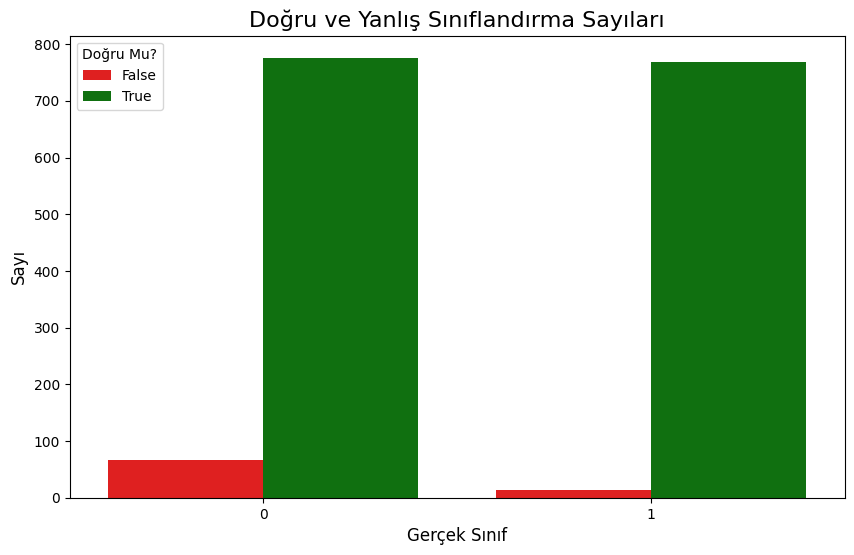

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Doğru ve yanlış sınıflandırma sayılarının hesaplanması
def classification_summary(y_test, predictions):
    df = pd.DataFrame({'True Class': y_test, 'Predicted Class': predictions})
    df['Correct?'] = df['True Class'] == df['Predicted Class']
    summary = df.groupby(['True Class', 'Correct?']).size().reset_index(name='Count')
    return summary

# Bar grafiği çizimi
def plot_classification_results(summary):
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x="True Class",
        y="Count",
        hue="Correct?",
        data=summary,
        palette={True: "green", False: "red"}
    )
    plt.title("Doğru ve Yanlış Sınıflandırma Sayıları", fontsize=16)
    plt.xlabel("Gerçek Sınıf", fontsize=12)
    plt.ylabel("Sayı", fontsize=12)
    plt.legend(title="Doğru Mu?")
    plt.show()

# Tahminler ve özet oluşturma
predictions = [classify(decision_tree, row) for _, row in X_test.iterrows()]
summary = classification_summary(y_test, predictions)

# Bar grafiğini çiz
plot_classification_results(summary)


#### 🚀 **Yapılan İşlemler**

1.  **Doğru ve Yanlış Sınıflandırmaların Özetlenmesi (classification_summary):**
    
    -   Test veri setindeki tahminler ve gerçek sınıf etiketleri karşılaştırılmıştır.
    -   **Özet Tablo:**
        -   Her bir gerçek sınıf için doğru ve yanlış sınıflandırmaların toplam sayısı hesaplanmıştır.
    -   **Sonuç:** Pandas DataFrame formatında bir özet oluşturulmuştur.
2.  **Bar Grafiği Çizimi (plot_classification_results):**
    
    -   Seaborn kütüphanesi kullanılarak, doğru ve yanlış sınıflandırmalar için bir bar grafiği çizilmiştir.
    -   **Grafik Özellikleri:**
        -   **Renk Kodlaması:**
            -   Doğru sınıflandırmalar için **yeşil**.
            -   Yanlış sınıflandırmalar için **kırmızı**.
        -   **X Ekseni:** Gerçek sınıf etiketleri (`True Class`).
        -   **Y Ekseni:** Sınıflandırma sayıları (`Count`).
        -   **Başlık:** "Doğru ve Yanlış Sınıflandırma Sayıları".
        -   **Legend:** Hangi barların doğru veya yanlış sınıflandırmaları temsil ettiğini gösterir.

### 📋 **ADIM 15: Sınıflandırma Sonuçlarının Tablo Olarak Gösterimi**

Bu adımda, test veri setindeki sınıflandırma sonuçları, tablo formatında düzenli ve görsel şekilde sunulmuştur. **Tabulate** kütüphanesi kullanılarak, doğru ve yanlış sınıflandırmalar işaretlenmiş ve detaylı bir tablo oluşturulmuştur.

In [18]:
from tabulate import tabulate

def classification_table(y_test, predictions):
    # y_test'i listeye çeviriyoruz
    y_test = y_test.tolist()
    data = {
        "Gerçek Sınıf": y_test,
        "Tahmin Edilen Sınıf": predictions,
        "Sonuç": ["✅ Doğru" if y_test[i] == predictions[i] else "❌ Yanlış" for i in range(len(y_test))]
    }
    table = tabulate(data, headers="keys", tablefmt="fancy_grid", stralign="center", numalign="center")
    print(table)

# Tablonun gösterimi
classification_table(y_test, predictions)


╒════════════════╤═══════════════════════╤═══════════╕
│  Gerçek Sınıf  │  Tahmin Edilen Sınıf  │   Sonuç   │
╞════════════════╪═══════════════════════╪═══════════╡
│       0        │           0           │ ✅ Doğru  │
├────────────────┼───────────────────────┼───────────┤
│       1        │           1           │ ✅ Doğru  │
├────────────────┼───────────────────────┼───────────┤
│       1        │           1           │ ✅ Doğru  │
├────────────────┼───────────────────────┼───────────┤
│       0        │           0           │ ✅ Doğru  │
├────────────────┼───────────────────────┼───────────┤
│       1        │           1           │ ✅ Doğru  │
├────────────────┼───────────────────────┼───────────┤
│       1        │           1           │ ✅ Doğru  │
├────────────────┼───────────────────────┼───────────┤
│       1        │           1           │ ✅ Doğru  │
├────────────────┼───────────────────────┼───────────┤
│       1        │           1           │ ✅ Doğru  │
├────────────────┼

#### 🚀 **Yapılan İşlemler**

1.  **Sınıflandırma Sonuçlarının Tabloya Dönüştürülmesi (classification_table):**
    
    -   **Gerçek ve Tahmin Edilen Sınıflar:**
        -   Test veri setindeki gerçek sınıf etiketleri ve model tarafından tahmin edilen sınıf etiketleri bir araya getirilmiştir.
    -   **Sonuç Kolonu:**
        -   Tahmin edilen sınıf etiketi gerçek sınıf etiketi ile karşılaştırılmıştır.
        -   **Doğru Tahminler:** "✅ Doğru" olarak işaretlenmiştir.
        -   **Yanlış Tahminler:** "❌ Yanlış" olarak işaretlenmiştir.

### 🔵 **ADIM 16: Confusion Matrix ile Sınıflandırma Performansının Görselleştirilmesi**

Bu adımda, karar ağacı modeli tarafından yapılan sınıflandırmaların performansı, bir **Confusion Matrix** (karmaşıklık matrisi) ile görselleştirilmiştir. Bu matriste doğru ve yanlış sınıflandırmalar detaylı bir şekilde analiz edilmiştir.

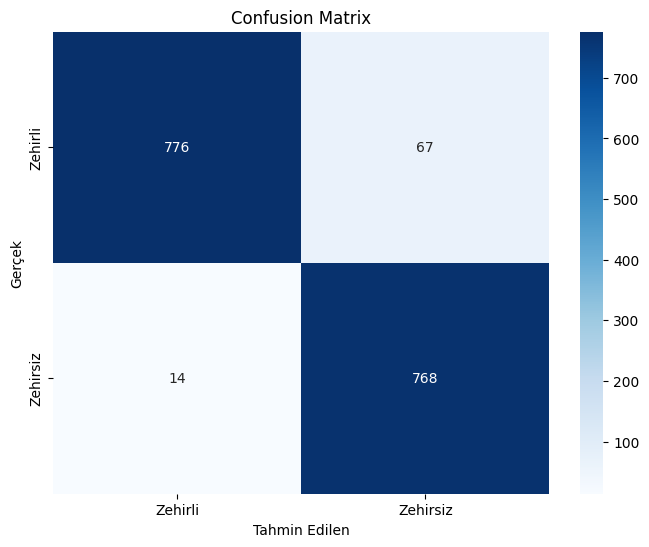

In [19]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def interactive_confusion_matrix(y_test, predictions):
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Zehirli', 'Zehirsiz'], yticklabels=['Zehirli', 'Zehirsiz'])
    plt.xlabel('Tahmin Edilen')
    plt.ylabel('Gerçek')
    plt.title('Confusion Matrix')
    plt.show()

# Gösterim
interactive_confusion_matrix(y_test, predictions)


#### 🚀 **Yapılan İşlemler**

1.  **Confusion Matrix Hesaplama:**
    
    -   **`confusion_matrix`** fonksiyonu kullanılarak, gerçek sınıf etiketleri (`y_test`) ve tahmin edilen sınıf etiketleri (`predictions`) arasındaki karşılaştırmalar bir matris formatında özetlenmiştir.
    -   **Matristeki Değerler:**
        -   **True Positive (TP):** Zehirli mantarın doğru şekilde zehirli olarak sınıflandırılması.
        -   **True Negative (TN):** Zehirsiz mantarın doğru şekilde zehirsiz olarak sınıflandırılması.
        -   **False Positive (FP):** Zehirsiz mantarın yanlış şekilde zehirli olarak sınıflandırılması.
        -   **False Negative (FN):** Zehirli mantarın yanlış şekilde zehirsiz olarak sınıflandırılması.
2.  **Heatmap ile Görselleştirme:**
    
    -   **Seaborn Kütüphanesi:**
        -   **`sns.heatmap`:** Karmaşıklık matrisi, görsel olarak daha anlaşılır hale getirilmiştir.
        -   **Renk Skalası:** `Blues` renk paleti kullanılarak doğru ve yanlış sınıflandırmalar vurgulanmıştır.


## 🎉 **Projemizin Sonuna Geldik!**

Merhaba! Biz Aslı Şemşimoğlu, Rabia Durgut ve Rabia Ebrar Dal.  
🍄 Bu proje ile mantarların sınıflandırılmasını detaylı bir şekilde inceleyerek, veri madenciliği ve görselleştirme becerilerimizi geliştirmeyi hedefledik. 🚀

----------

### 🌟 **Projemizde Neler Yaptık?**

-   Mantar veri setindeki özellikleri analiz ederek önemli içgörüler elde ettik.
-   Gini algoritmasını kullanarak sınıflandırma algoritması geliştirdik.
-   Veri temizleme, dönüştürme ve değerlendirme gibi veri analitiği adımlarını uyguladık.
-   Algoritma performansını metrikler ve görselleştirmelerle detaylı bir şekilde analiz ettik.

Bu süreçte öğrendiklerimizi ve geliştirdiğimiz teknikleri paylaşmaktan büyük keyif aldık!  
Umarız bu proje, sınıflandırma algoritmaları ve veri analitiği ile ilgilenen herkes için faydalı bir rehber olmuştur. 😊

----------

### 🔗 **Bizi Takip Edin!**

Projelerimizi ve çalışmalarımızı daha yakından takip etmek veya bizimle iletişim kurmak isterseniz aşağıdaki bağlantılardan ulaşabilirsiniz:

#### **Aslı Şemşimoğlu**

💻 [Kaggle](https://www.kaggle.com/aslemimolu)  
💼 [LinkedIn](https://www.linkedin.com/in/aslisemsimoglu/)  
📊 [GitHub](https://github.com/aslisemsimoglu)

#### **Rabia Durgut**

💻 [Kaggle](https://www.kaggle.com/rabiadurgut)  
💼 [LinkedIn](https://www.linkedin.com/in/rabiadurgut/)  
📊 [GitHub](https://github.com/rabiadurgt)

#### **Rabia Ebrar Dal**

💻 [Kaggle](https://www.kaggle.com/rabiaebrardal)  
💼 [LinkedIn](https://www.linkedin.com/in/rabia-ebrar-d-7b90862a8/)  
📊 [GitHub](https://github.com/rabiaebrar-dal)

----------

### 💬 **Geri Bildirimleriniz Önemli!**

Projemizle ilgili görüşlerinizi paylaşmak veya bize sorular sormak isterseniz her zaman ulaşabilirsiniz.  
Bir sonraki projelerimizde de sizinle buluşmaktan mutluluk duyarız! 💻✨

Teşekkürler ve iyi çalışmalar dileriz! 👋